# 1D Random Walk

## Import libraries

In [7]:
import numpy as np #handles arrays 
import matplotlib.pyplot as plt #for plotting (basic)
import seaborn as sns #also for plotting 
from IPython.display import display, Latex #for formatting print
import random #for choosing direction randomly

In [2]:
# Random generator of numpy 
rng = np.random.default_rng()

## Simulation of a single simple random walker in 1D Interval [1,10]

### Start with 1 value of number of steps

In [3]:
#define the parameters of the problem
n_steps=10 #number of steps 
n_walkers=1 #number of walkers
S_0=5
x_min=1
x_max=10

#### Method 1: 
Loop over # of steps (100 in this case) and in each iteration generate a step to the left (-1) or a step to the right (+1)

#### Method 2: 
Generate all 100 steps (in this case) at once: 

rng.integers(low, high=None, size=None) allows us to generate 'size' amount of integers from [low, high). 

If we do low=-1, and high=1 we will also generate 0s. 

To overcome this we will generate 1s and 2s and then convert them to -1 and +1

A downside for this method for the interval is that it's possible we reached one of the boundaries (x=1 or x=10) at step n<100, and thus generating more steps is futile. One can use method 1 (generating one step at a time) and use parallel looping to simulate faster (see moodle). 

## Method 1: generate one step at a time

In [34]:
#define the possible directions for each step
left, right=[-1, 1] #moving left will advance the walker by -1; moving to the right will advance the walker by +1
all_directions=[left, right] #we will choose either left or right 

In [35]:
#In the problem presented here, we should stop advancing once we reach either of the boundary conditions
# We will use a for loop, and break when we reach either boundaries 

#first create the array S_n, where element(index) i is the location of the walker after i steps 
S_n=np.zeros(n_steps)
for i in range(1,n_steps): #add location for all the other steps 
    S_n[i] = S_n[i-1] +random.choice(all_directions) #we will choose either direction randomly and advance accordingly from our location
    if(S_n[i]==x_min or S_n[i]==x_max): #if we reach either boundaries 
        break #stop the loop, stop advancing 
S_n=S_n+S_0

In [36]:
#with this method, we get the answer of when the walker reached either boundaries immediately:
exit_step_num=i
exit_location=S_n[i]
print('The walker reached either k=1 or k=10 after %d steps'%exit_step_num) #number of steps it took to reach either boundaries
print('The walker exited at k=%d'%exit_location) #the boundary the walker reached

The walker reached either k=1 or k=10 after 9 steps
The walker exited at k=8


## Method 2: generate many steps at once

In [39]:
#Step 1: generate random integers 1 or 2
# The number of integers we need to generate is n_steps*n_walkers 
# by specifying size=(n_simu,n_step) we ask to generate integers in form of a matrix, where each row is a walker and each column is a step
simu= rng.integers(1,3, (n_walkers,n_steps)) 

#Step 2: convert the generated numbers of 1 and 2 to -1 and +1 
steps = (simu==1)*-1+(simu>1)*1 #converts 1 and 2 to -1 (step to the left) and 1 (step to the right)

#### Find S_n

In [40]:
S_n = S_0+np.cumsum(steps,1) 
# S_n is a matrix where each row is a walker, and the columns represent the location.
# For example: row 0 and column 322 is the first walker and its location after 323 steps. 

# Notice! No boundary or geometrical properties of the problem were implemented yet. 

#### What is np.cumsum? 
np.cumsum(steps,1)  cumulatively sums over the steps. For example, if steps=[-1,1,1,1] then np.cumsum(steps) = [-1,  0,  1,  2]

Since: np.cumsum(steps) = [-1 = -1,  -1+1=0,  -1+1+1= 1, -1+1+1 = 2]

<br>

The '1' after the comma specific if we perform the cumsum over the columns or the rows. For 0 we cumulatively sum over values in all the rows (for each separate column) and for 1 we cumulatively sum over values in all the columns (for each separate row).

Let us take an example: 
Do we sum over all the values in the first row (which is the first walker), i.e. over all the columns (or steps) of the first row (walker), and repeat the process for each row (walker)? 

OR 

Do we sum over all the values in the first column (which is the first step), i.e. over all the rows (or walkers) of the first column (step), and repeat the process for each column (step)?

#### Example

In [24]:
#to understand cumsum better we will look at an example 
example_array=np.array([[-1,1,1,1], [1,1,1,-1], [-1,1,1,-1]])
example_array

array([[-1,  1,  1,  1],
       [ 1,  1,  1, -1],
       [-1,  1,  1, -1]])

In [25]:
np.cumsum(example_array, axis=0) # sum over all the rows, for each separate column

array([[-1,  1,  1,  1],
       [ 0,  2,  2,  0],
       [-1,  3,  3, -1]])

In [26]:
np.cumsum(example_array, axis=1) # sum over all the columns, for each separate row

array([[-1,  0,  1,  2],
       [ 1,  2,  3,  2],
       [-1,  0,  1,  0]])

#### Find when walker reached k=1 or k=10

In [27]:
#find when the walker(s) reached k=1
reach_left_boundary = (S_n == x_min) #false (=0) if we reached left boundary, true (=1) otherwise
#check how many times the walker(s) reached k=1
num_reach_left_boundary = np.sum(reach_left_boundary,1) # element at location i corresponds to how many times walker i reached k=1

#find when the walker(s) reached k=10
reach_right_boundary = (S_n == x_max) #false (=0) if we reached right boundary, true (=1) otherwise
#check how many times the walker(s) reached k=10
num_reach_right_boundary = np.sum(reach_right_boundary,1) # element at location i corresponds to how many times walker i reached k=10

#### In our case, because there is only one walker, num_reach_left_boundary and num_reach_right_boundary contain a single value (you can print either to convince yourself)

#### If num_reach_left_boundary = 0 then the walker never reached the left boundary. Similarly, if num_reach_right_boundary = 0 then the walker never reached the right boundary

#### When num_reach_left_boundary $\neq$ 0 then the walker reached the left boundary, and we are interested in finding out when was the first time the walker reached the boundary. Note that if we had used the method 1, with a condition to stop generating steps once reaching either boundaries, we needen't have had to calculate these quantities (we would have gotten them directly). 

#### Same approach is used when num_reach_right_boundary $\neq$ 0.

In [28]:
#Step 1: reach if we reached the boundary k=1
if num_reach_left_boundary[0]!=0: # check if the single walker reached the left boundary at some point  
    #Step 2: Find when we reached the left boundary for the first time  
    first_time_left=np.where(S_n[0,:]==x_min)[0][0] # if reached, find when it reached for the first time
else: #if the walker didn't reach the left boundary 
    first_time_left = n_steps-1 #we insert the maximal number of steps, note that this isn't a true answer, but a workaround. 

#we repeat the same process for the right boundary 
if num_reach_right_boundary[0]!=0: # check if the single walker reached the right boundary at some point  
    #Step 2: Find when we reached the left boundary for the first time  
    first_time_right=np.where(S_n[0,:]==x_max)[0][0] # if reached, find when it reached for the first time
else: #if the walker didn't reach the left boundary 
    first_time_right = n_steps-1 #we insert the maximal number of steps, note that this isn't a true answer, but a workaround. 

#### We want to find the first time the walker reaches k=1 OR k=10

#### We will check what happens first: reaching k=1 or reaching k=10

In [29]:
exit_step_num = min(first_time_left, first_time_right) # the step # where the walker reached k=1 or k=10, whichever came first 
exit_location = S_n[0, exit_step_num] # where the walker was when finishing: at k=1 or k=10

In [30]:
print('The walker reached either k=1 or k=10 after %d steps'%exit_step_num) #final answer

The walker reached either k=1 or k=10 after 9 steps


## Plot trajectory

In [37]:
x_array

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

In [41]:
S_n

array([[ 4,  3,  2,  3,  2,  1,  2,  1,  0, -1]])

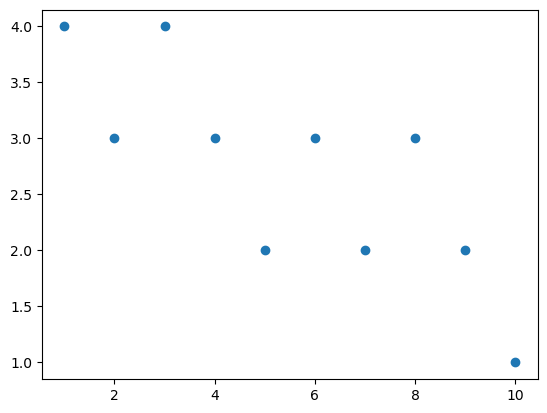

In [31]:
x_array=np.arange(1,exit_step_num +2) #our x-axis is the steps until reaching k=1 or k=10 (including)
plt.scatter(x_array,S_n[ :exit_step_num+1]) #plot to get a feeling of what we should get

Text(0, 0.5, 'Location of Walker ($S_n$)')

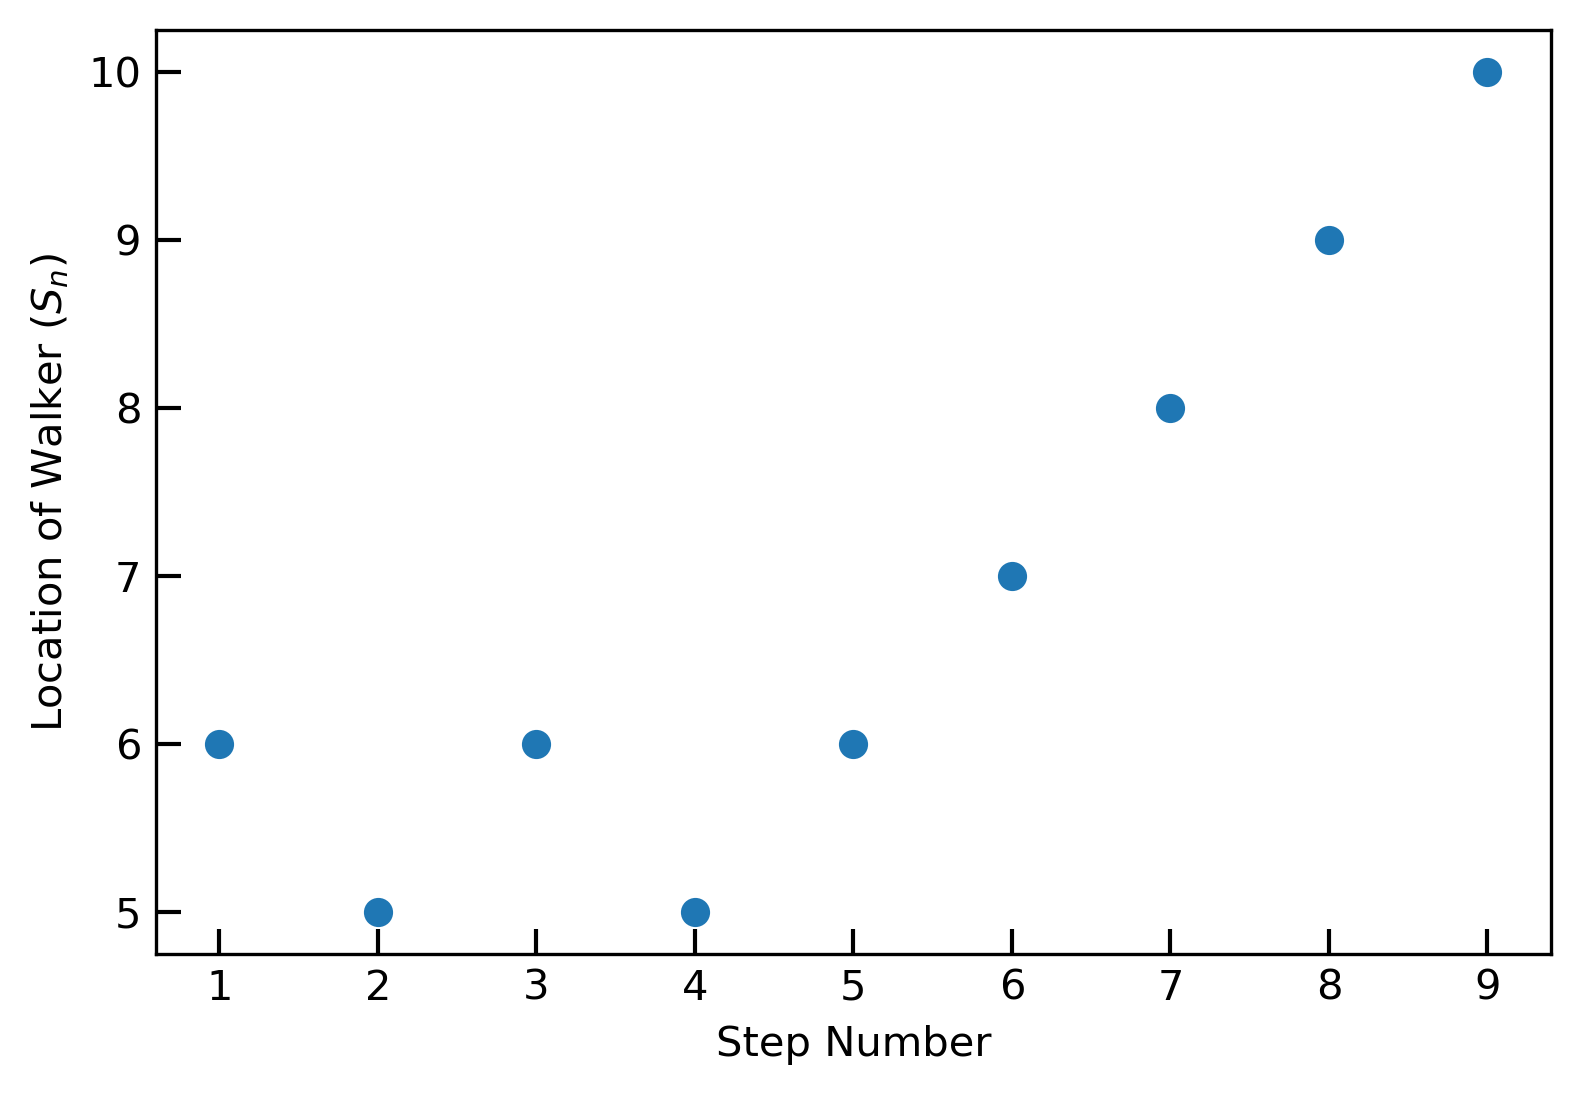

In [94]:
#format your plot 
row_num, col_num=1,1
fig,ax = plt.subplots(row_num,col_num)
fig.set_size_inches(6*col_num,4*row_num)
fig.set_dpi(300)


ax.scatter(x_array,S_n[0, :exit_step_num+1])
ax.tick_params(axis='both', which='major', direction='in', length=6, width=1)
ax.set_xlabel('Step Number')
ax.set_ylabel(r'Location of Walker ($S_n$)')

### Repeat above for all # of steps

In [77]:
#define the parameters of the problem
n_steps=[100, 1000, 10000, 100000] #number of steps 
n_walkers=1 #number of walkers
S_0=5
x_min=1
x_max=10

In [78]:
def find_boundary(walker_index, S_n, n_step, num_reach_left_boundary,num_reach_right_boundary):    
    #### Step 1: reach if we reached the boundary k=1 ####
    if num_reach_left_boundary[walker_index]!=0: # check if the single walker reached the left boundary at some point  ####
        #Step 2: Find when we reached the left boundary for the first time  
        first_time_left=np.where(S_n[walker_index,:]==x_min)[0][0] # if reached, find when it reached for the first time
    else: #if the walker didn't reach the left boundary 
        first_time_left = n_step-1 #we insert the maximal number of steps, note that this isn't a true answer, but a workaround. 
    
    #we repeat the same process for the right boundary 
    if num_reach_right_boundary[walker_index]!=0: # check if the single walker reached the right boundary at some point  
        #Step 2: Find when we reached the left boundary for the first time  
        first_time_right=np.where(S_n[walker_index,:]==x_max)[0][0] # if reached, find when it reached for the first time
    else: #if the walker didn't reach the left boundary 
        first_time_right = n_step-1 #we insert the maximal number of steps, note that this isn't a true answer, but a workaround. 


    exit_step_num = min(first_time_left, first_time_right) # the step # where the walker reached k=1 or k=10, whichever came first 
    exit_location = S_n[walker_index, exit_step_num] # where the walker was when finishing: at k=1 or k=10

    return exit_step_num, exit_location

In [79]:
#create a variable to save the S_n of a single walker for each # of steps 
S_ns={} #I will choose a dictionary, but you can choose a numpy array, or a list, whatever is convenient for you
last_step={}
for n_step in n_steps:
    #Step 1: generate random integers 1 or 2
    simu= rng.integers(1,3, (n_walkers,n_step)) #notice n_steps changed to n_step
    
    #Step 2: convert the generated numbers of 1 and 2 to -1 and +1 
    steps = (simu==1)*-1+(simu>1)*1 #converts 1 and 2 to -1 (step to the left) and 1 (step to the right)

    #Step 3: find S_n
    S_n = S_0+np.cumsum(steps,1) 

   #step 4: find when reached k=1 or k=10
    #find when the walker(s) reached k=1
    reach_left_boundary = (S_n == x_min) #false (=0) if we reached left boundary, true (=1) otherwise
    #check how many times the walker(s) reached k=1
    num_reach_left_boundary = np.sum(reach_left_boundary,1) # element at location i corresponds to how many times walker i reached k=1
    
    #find when the walker(s) reached k=10
    reach_right_boundary = (S_n == x_max) #false (=0) if we reached right boundary, true (=1) otherwise
    #check how many times the walker(s) reached k=10
    num_reach_right_boundary = np.sum(reach_right_boundary,1) # element at location i corresponds to how many times walker i reached k=10

    # we will use a function to write the logic of finding when we reached the boundaries, and get the final values from it
    exit_step_num, exit_location = find_boundary(0, S_n, n_step, num_reach_left_boundary,num_reach_right_boundary)  #we have a single random walker, so the walker_index=0 (as above)
    
    
    S_ns[n_step]=S_n[0, :exit_step_num+1] #save the trajectory until the walker reaches a boundary 
    last_step[n_step]=exit_step_num

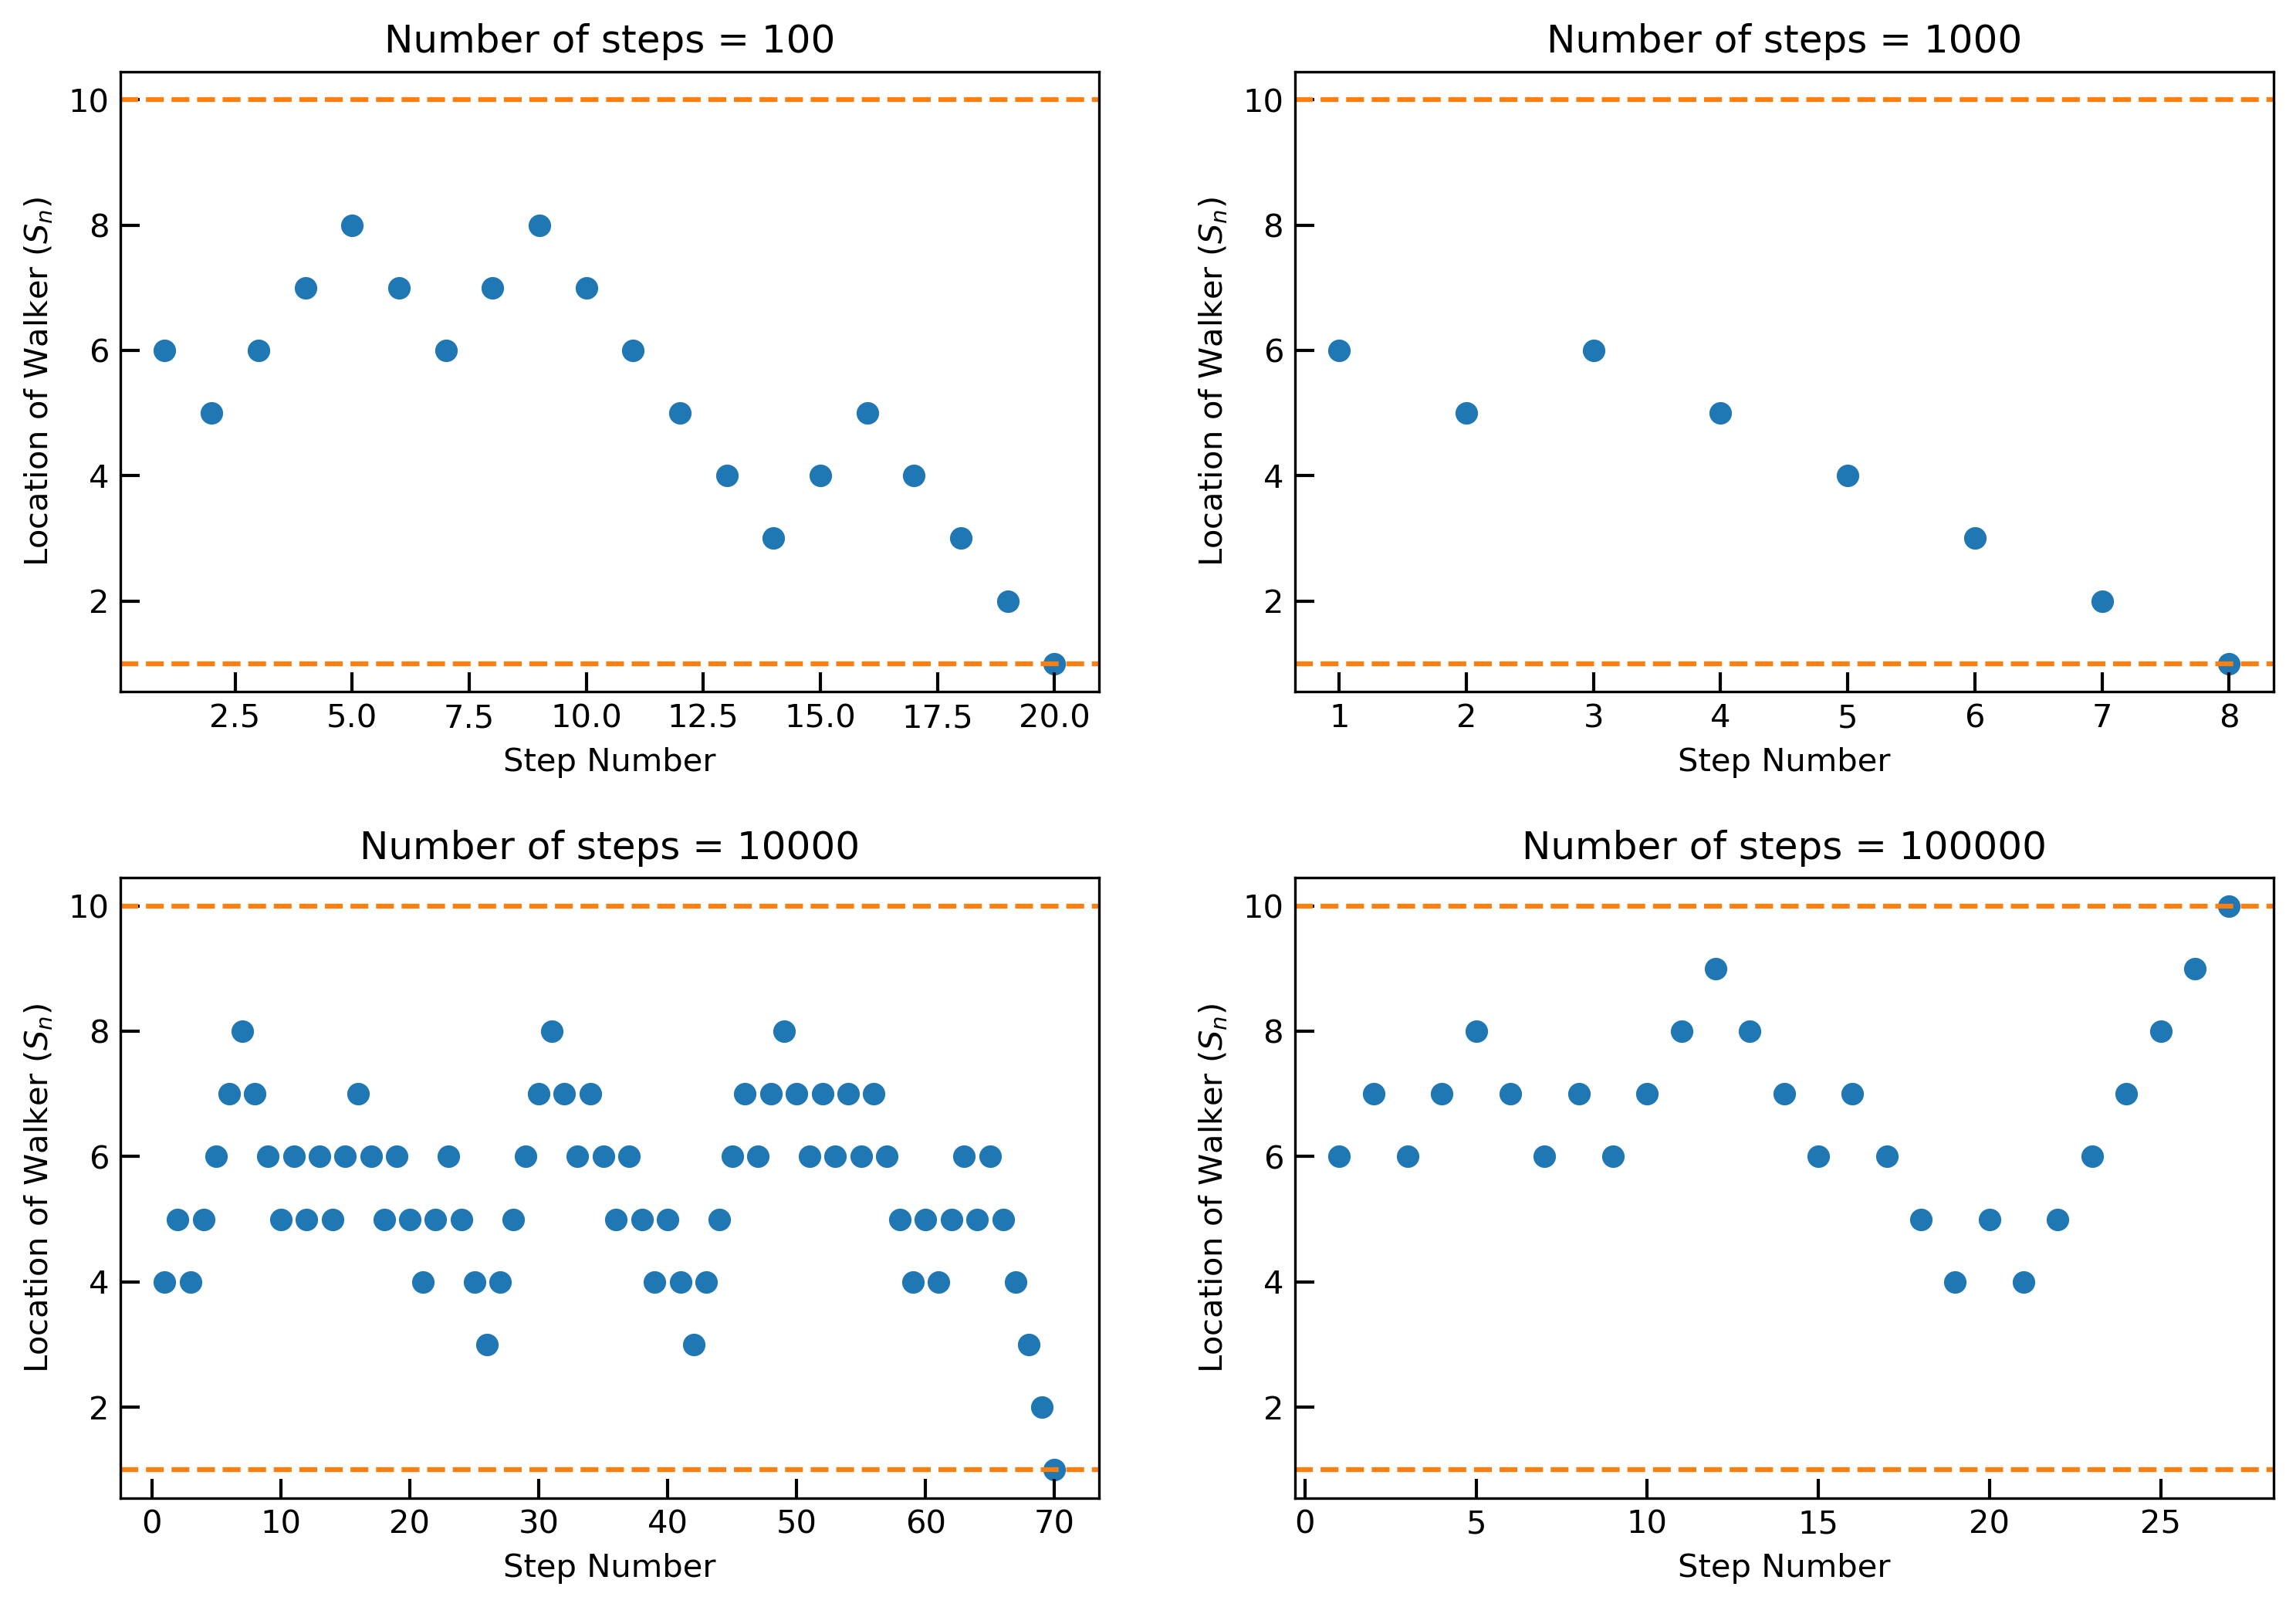

In [80]:
#plot the trajectories for each # of steps 

row_num, col_num=2,2
fig,ax = plt.subplots(row_num,col_num)
fig.set_size_inches(6*col_num,4*row_num)
fig.set_dpi(300)

axs=ax.ravel()

for i, n_step in enumerate(n_steps):
    #define the x_array for each # of steps
    x_array=np.arange(1,last_step[n_step]+2)
    S_n=S_ns[n_step]
    axs[i].scatter(x_array,S_n)
    axs[i].tick_params(axis='both', which='major', direction='in', length=6, width=1)
    axs[i].set_xlabel('Step Number')
    axs[i].set_ylabel(r'Location of Walker ($S_n$)')
    axs[i].set_title('Number of steps = %d'%n_step)
    #add a horizontal line at y=1 and y=10 to illustrate the boundaries
    axs[i].axhline(y=x_min, linestyle='dashed', color='tab:orange')
    axs[i].axhline(y=x_max, linestyle='dashed', color='tab:orange')

fig.subplots_adjust(hspace=0.3)

## Simulation of 1 million simple random walkers in 1D

In [116]:
#define the parameters of the problem
n_steps=1000 #number of steps 
n_walkers=1000000 #number of walkers
S_0=5
x_min=1
x_max=10

## Method 1: generate one step at a time

In [117]:
#define the possible directions for each step
left, right=[-1, 1] #moving left will advance the walker by -1; moving to the right will advance the walker by +1
all_directions=[left, right] #we will choose either left or right 

##### We should stop advancing once we reach either of the boundary conditions
##### We will use a for loop, and break when we reach either boundaries 

##### Note that in this method, due to the double loop (loop over the walkers, and over the steps) the compilation may be slow 
##### A solution to this is to use parallel looping (see at the end)
##### For now we will present the iterative looping

In [118]:
#this time S_n will be 2D: each column i is still the location of walker after i steps, and each row j is walker no. j
S_n=np.zeros((n_walkers,n_steps))

#save the step # and the boundary the walker exited from
all_exit_step_num, all_exit_location = np.zeros(n_walkers), np.zeros(n_walkers)
S_n=S_n+S_0
for j in range(n_walkers): #repeat the process described above for each walker 
    for i in range(n_steps): #add location for all the other steps 
        S_n[j, i] = S_n[j, i-1] +random.choice(all_directions) #we will choose either direction randomly and advance accordingly from our location
        if(S_n[j,i]==x_min or S_n[j, i]==x_max): #if we reach either boundaries 
            all_exit_location[j]=S_n[j,i]
            all_exit_step_num[j]=i
            break #stop the loop, stop advancing

## Method 2: generate many steps at once

In [82]:
#Step 1: generate random integers 1 or 2
simu= rng.integers(1,3, (n_walkers,n_steps)) 

#Step 2: convert the generated numbers of 1 and 2 to -1 and +1 
steps = (simu==1)*-1+(simu>1)*1 #converts 1 and 2 to -1 (step to the left) and 1 (step to the right)

#Step 3: find S_n
S_n = S_0+np.cumsum(steps,1) 

#step 4: find when reached k=1 or k=10
#find when the walker(s) reached k=1
reach_left_boundary = (S_n == x_min) #false (=0) if we reached left boundary, true (=1) otherwise
#check how many times the walker(s) reached k=1
num_reach_left_boundary = np.sum(reach_left_boundary,1) # element at location i corresponds to how many times walker i reached k=1

#find when the walker(s) reached k=10
reach_right_boundary = (S_n == x_max) #false (=0) if we reached right boundary, true (=1) otherwise
#check how many times the walker(s) reached k=10
num_reach_right_boundary = np.sum(reach_right_boundary,1) # element at location i corresponds to how many times walker i reached k=10


#here we need to loop over all 1 million walkers to find the when all of them reach k=1 or k=10
#this time, I will choose to save the data as a numpy array 
all_exit_step_num, all_exit_location = np.zeros(n_walkers), np.zeros(n_walkers)
for i in range(n_walkers): 
    exit_step_num, exit_location = find_boundary(i, S_n, n_steps, num_reach_left_boundary,num_reach_right_boundary)
    all_exit_step_num[i], all_exit_location[i] = exit_step_num, exit_location

## Probability of reaching k=1, and average number of steps for reaching k=1 or k=10

#### To find out the probability of reaching k=1 we will find out how many times (how many walkers) exited first at k=1

In [119]:
number_of_walkers_left=np.where(all_exit_location==1)[0].shape[0] 
#Explanation: we will find all the indices where the walker finished at 1 (np.where), and then find the # of all the indices using shape

In [120]:
#the probability is the number of times (walkers) the left boundary was reached first, out of all the walkers. 
probability_exit_left_simulation = number_of_walkers_left/n_walkers

#### The analytical answer is given by (n-k)/(n-1), where in this case n=10; k=1

In [121]:
probability_exit_left_analytical = (x_max-S_0)/(x_max-1)

In [122]:
display(Latex('The analytical probability of reaching 1 first is %f%%'%probability_exit_left_analytical))
display(Latex('The probability of reaching 1 first (from simulations) is %f%%'%probability_exit_left_simulation))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### The probability we got from simulations matches the analytical probability

In [123]:
average_number_of_steps_simulations = np.mean(all_exit_step_num+1) #we add 1 to convert fron python index to #of steps

#### The analytical answer is given by (n-k)(k-1), where in this case n=10; k=1

In [124]:
average_number_of_steps_analytical = (x_max-S_0)*(S_0-1)

In [125]:
display(Latex('The analytical average number of steps of reaching 1 or 10 is %f'%average_number_of_steps_analytical))
display(Latex('The average number of steps of reaching 1 or 10(from simulations) is %f'%average_number_of_steps_simulations))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### The average number of steps for reaching k=1 or k=10 matches the analytical answer 